***
<h1><center> Engineering Tripos Part IB, Experiment M1 </center></h1> 
<h1><center> Experimental Engineering, Materials Teaching Laboratory </center></h1>

***


## Introduction

In this experiment you will measure natural frequencies of vibrating beams after impulsive loading.  Carefully supported beams will be struck, and the resulting vibrations measured using a microphone and data-logger.The frequency of free vibration of beams depends on the density (the inertia) and the stiffness – low density and high stiffness mean higher frequencies.  The stiffness of beams in turn depends on the geometry (the length and cross-sectional shape) and the material (the Young’s modulus).  The decay rate of the vibrations also provides information on damping – i.e. energy loss during vibration. Two materials will be considered:  aluminium alloy and the polymer PMMA.

## Method

Start by importing the necessary modules (pydvma is a python package written for data acquisition at CUED).

In [1]:
%gui qt

In [2]:
import pydvma as dvma
from labs import m1

Choose your acquisition settings. The defaults are:

* channels=2 (number of channels to record)
* fs=44100 (sampling rate in Hz)
* chunk_size=1024 (number of data samples accumulated at a time)
* num_chunks=6 (number of chunks to display in time window of oscilloscope)
* stored_time=2 (time in seconds to record data for)
* device_index = None (which prompts you for which device to use)

We want to use the default soundcard for the microphone, we only need one channel, and a lower sampling rate works well for this lab:

In [6]:
settings = dvma.mySettings(channels=1,fs=8000,stored_time=2,device_index=1)

Now open an oscilloscope using your settings. This shows three plots:

* the top one is like a normal oscilloscope showing the signal (toggle on/off with 'T');
* the middle one shows the frequency spectrum of the signal (toggle on/off with 'F');
* the bottom one shows the signal amplitudes (toggle on/off with 'L');

Press the **space bar** to record data from the past few seconds (this is the value 'stored_time').

* The first time you press it you will be prompted for where to save your data. Make sure you save it in your teaching system folder.
* Subsequent times you press it will auto-save to the same folder with a number added to the filename.
* Press 's' if you want to save data to a new filename or location. Pressing space after that will auto-save with the new name.

Once opened leave the oscilloscope running. If you do close it and want to open it again, then then restart this notebook using the 'kernel' menu and select 'restart kernel and clear output'. You can then run the import section above and jump to the read_data() section below.

**Note that pressing 'space' captures the past N seconds of data: so you need to tap the beam, wait a second, then press space!**

In [10]:
osc = dvma.oscilloscope(settings)

1 Microphone Array (Realtek High 
Selected device: 1 : Microphone Array (Realtek High 


Once you have a good example dataset you can read your data files and plot them.

In [ ]:
dataset = dvma.read_data()

<IPython.core.display.Javascript object>


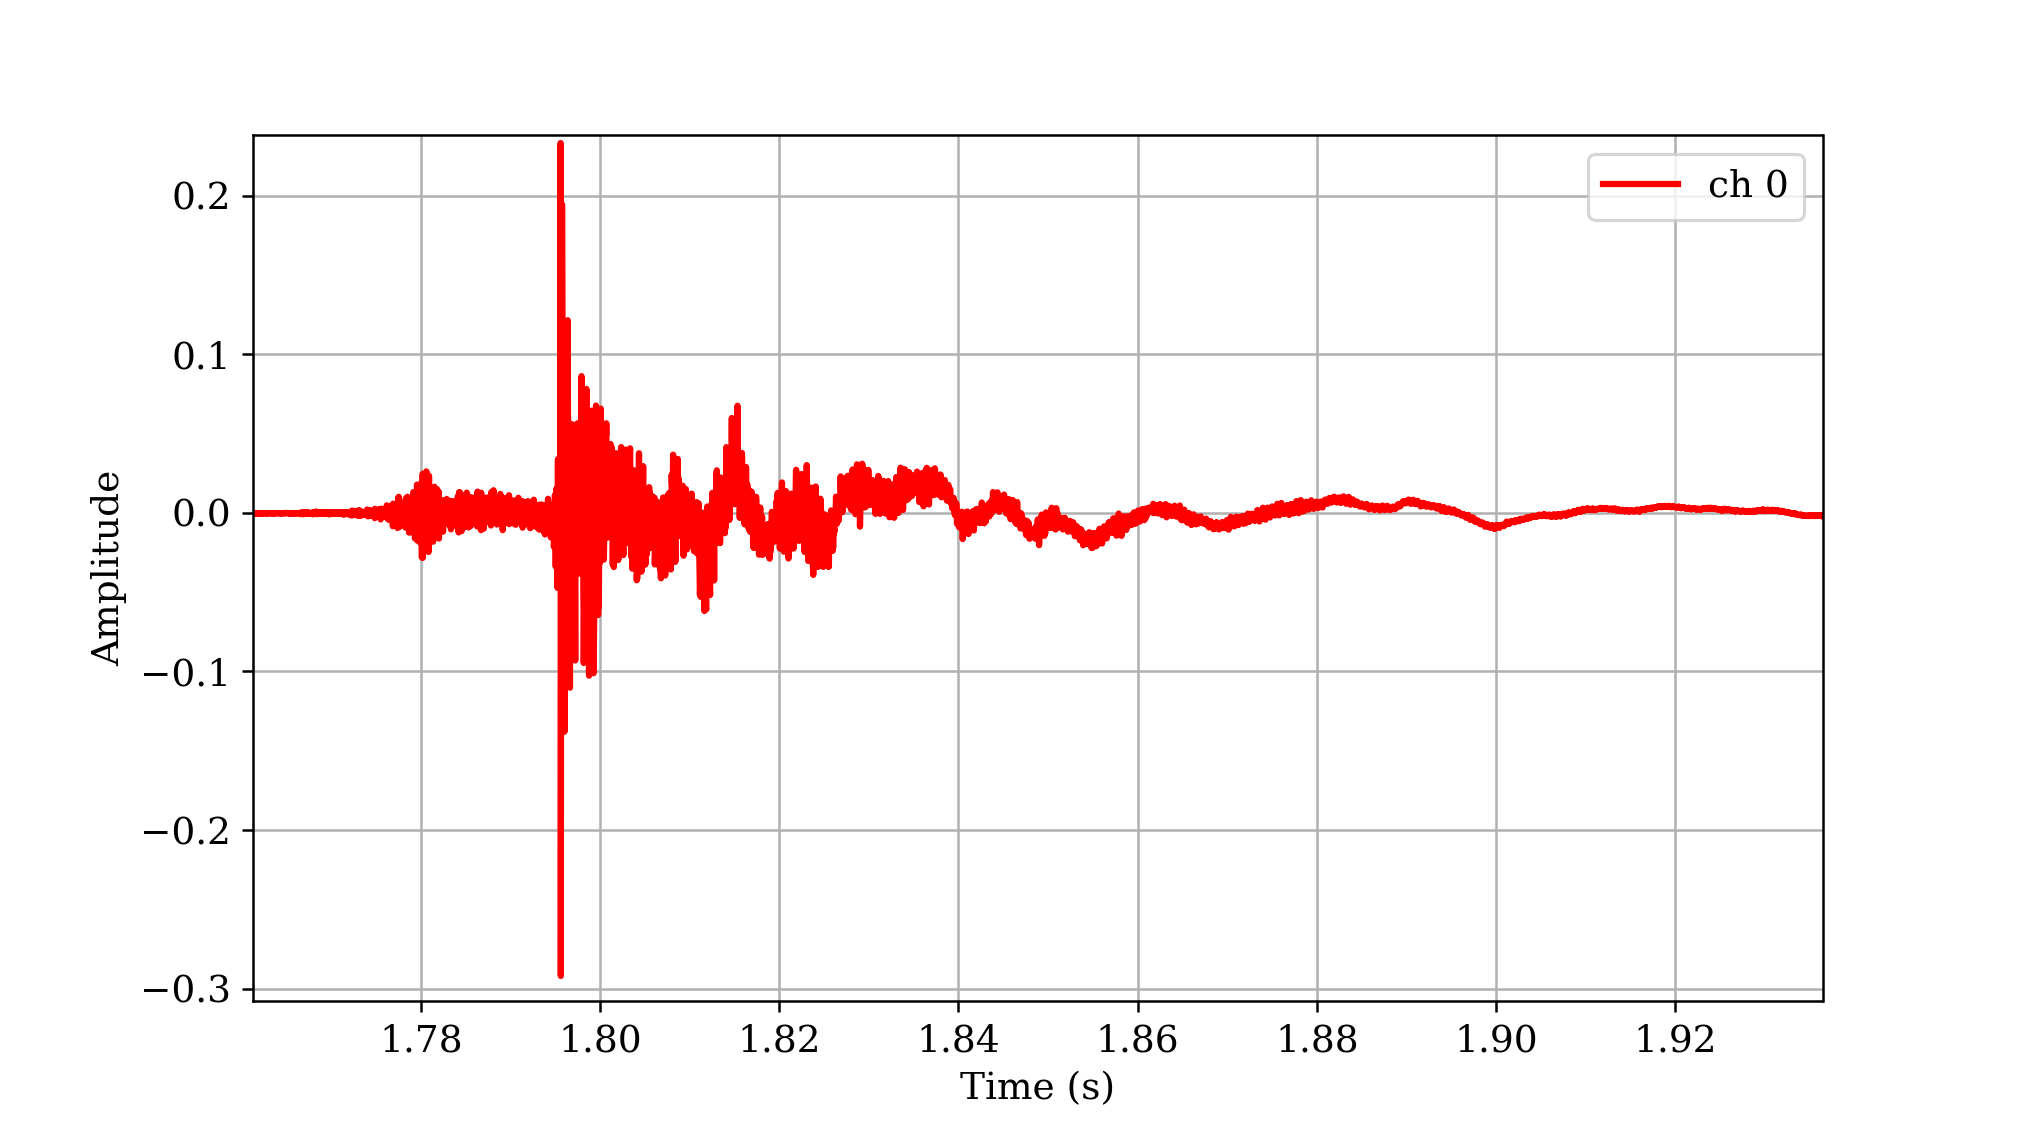

In [12]:
%matplotlib notebook
timeplot = dvma.plotdata(dataset.timeData)

Zoom in on the section of time where you can an impact and its decay down to (nearly) zero. We will use this bit of data to calculate its spectrum and find the resonant peaks of the beam.

<IPython.core.display.Javascript object>


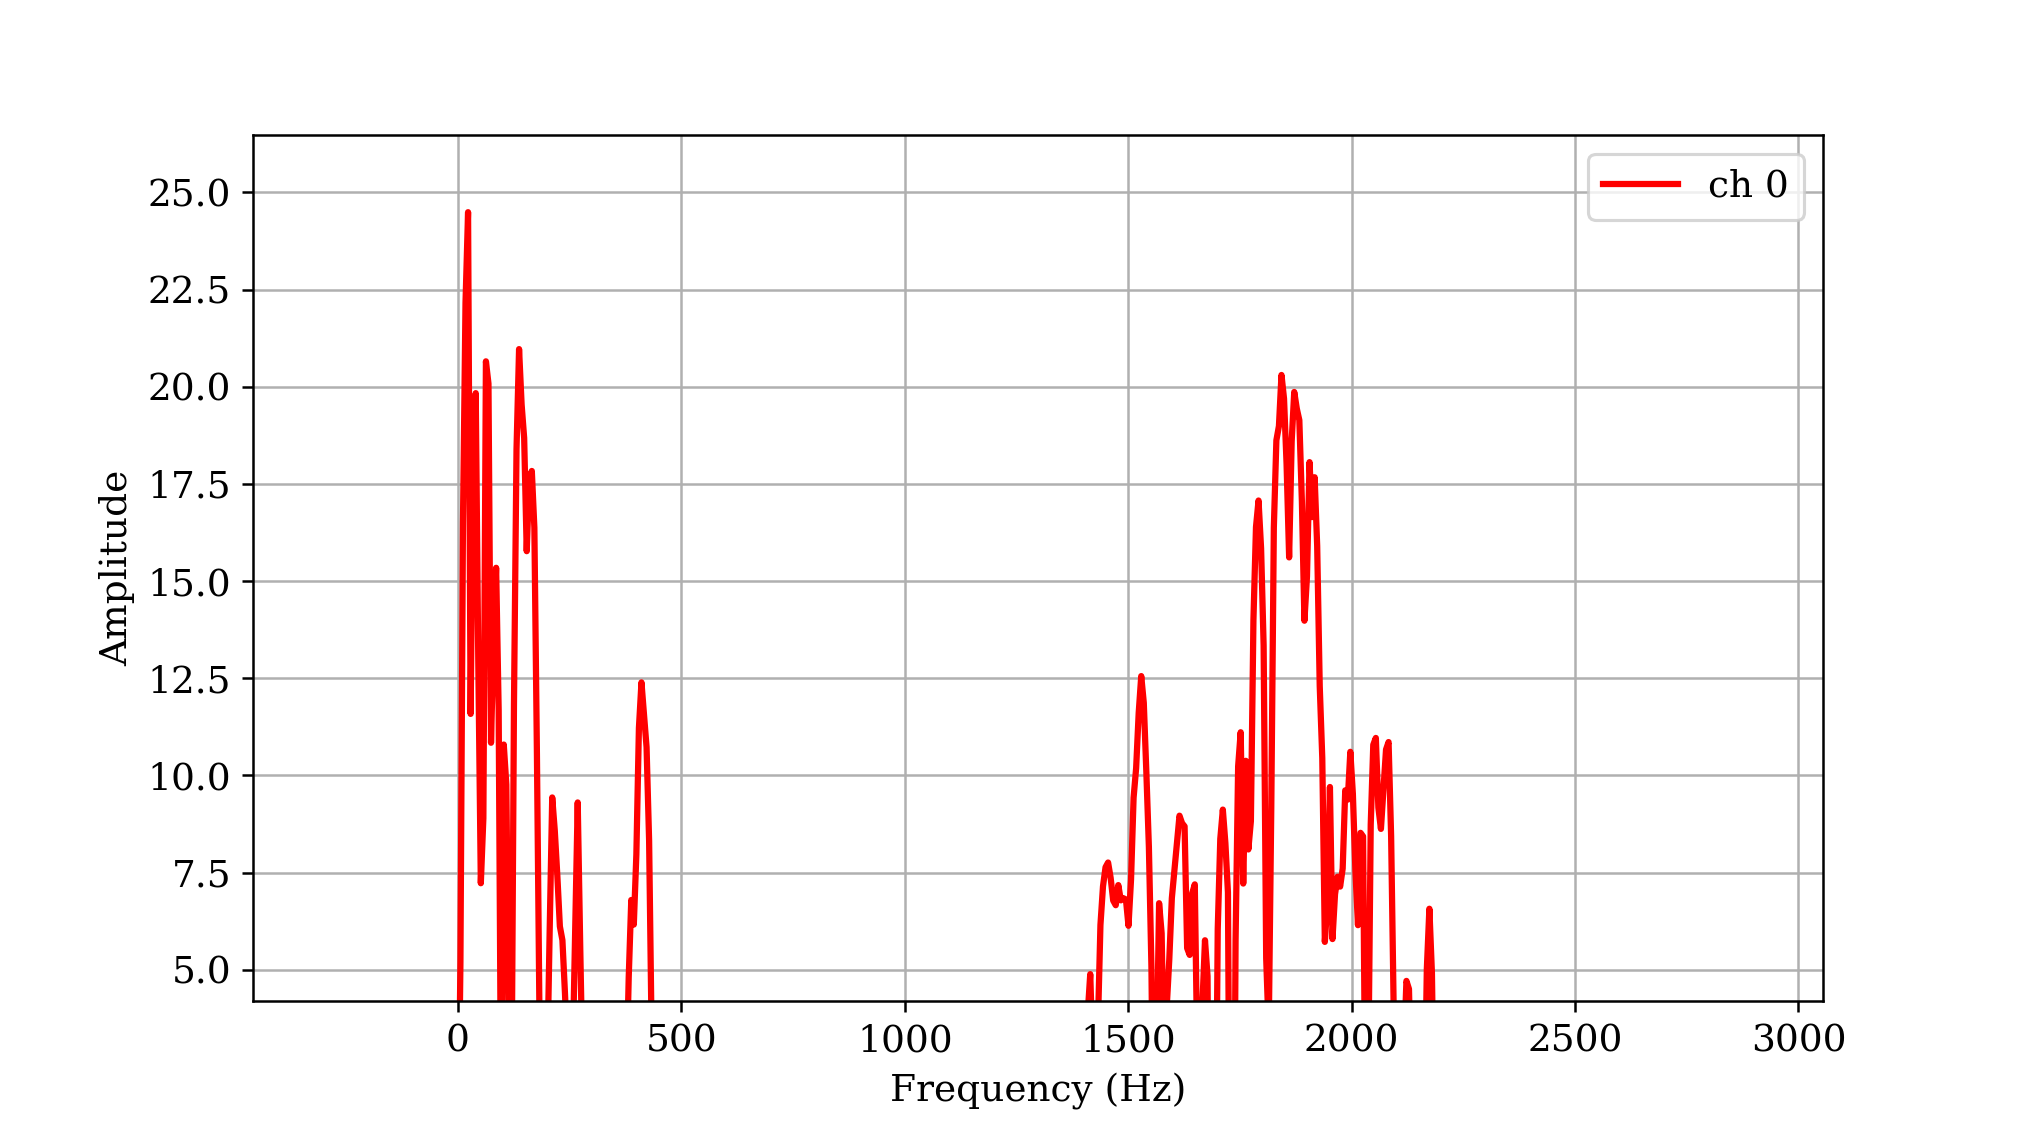

In [17]:
dataset.freqData = dvma.convert_to_frequency(dataset.timeData, time_range=timeplot)
freqplot = dvma.plotdata(dataset.freqData)

Zoom in on the required resonant peaks in the frequency domain plot, then use 'find_peaks' from the m1 labs module to record their exact values.

Note that the peak finder is using the zoomed range of your 'freqplot' and will only find peaks in this frequency range, and only those that are in view. So if you zoom in and chop off the noisy low-amplitude data then that can help isolate the most prominant peaks.

In [18]:
p,a = m1.find_peaks(dataset.freqData,freq_range=freqplot)

33 peaks have been found. The first 10 are:
[ 22.83  39.95  62.77  85.6  102.7  137.   165.5  211.1  268.2  388.  ]
To reduce the number of peaks, use a higher threshold. If using a plot to specifiy the threshold then use the zoom to view only the peaks and not the noisy data underneath.


Next, we will be calculating the Young's Modulus of the beam.

First of all, measure the length **(L)**, width **(b)**, thickness **(d)** and mass **(M)** of your beam in $m$ and $kg$, respectively, and record them below:

In [20]:
beam_data=m1.beam(L= 1, b= 2, d= 3, M= 4) # remember units are meters and kilograms!

Finally, use the function below to find the Young's Modulus of aluminium. 

The required arguments are:
* beam_data
* the natural frequency of one of the modes of the beam
* the mode number corresponding to that frequency

Now use the E_calculator() function for each mode and make sure your values agree with databook values. If any value is very far from what you expect then this is probably because the frequency is not associated with the mode number.

E is calculated using the following equation:
$$(2\pi f)^2\times\left(\frac{L}{\alpha_L}\right)^4\times\rho\times\frac{A}{I}$$

In [22]:
E = m1.E_calculator(beam=beam_data,frequency=153.45,mode=1)

TypeError: E_calculator() got an unexpected keyword argument 'beam'